In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
plt.style.use('dark_background')

In [ ]:
def RMSE(y,y_hat):
    return ((y-y_hat)**2).sum()/len(y)
def MAE(y,y_hat):
    return (abs(y-y_hat).sum())/len(y)
def evaluate_model(model,X_train,X_test,y_train,y_test,reshape=False):
    model     = model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    r2 = model.score(X_test,y_test)
    print(f'Training R2:\n\t{model.score(X_train,y_train)}')
    print(f'Test R2:\n\t{r2}')
    return model.predict(X_test),model,r2
X_train = pd.read_csv('X_train.csv').drop('HADM_ID',axis=1)
X_test  = pd.read_csv('X_test.csv').drop('HADM_ID',axis=1)
y_train = pd.read_csv('y_train.csv').drop('HADM_ID',axis=1)
y_test  = pd.read_csv('y_test.csv').drop('HADM_ID',axis=1)

results_regression,results_forest = y_test.copy(),y_test.copy()

In [ ]:
# following columns have same mean LoS accross all levels 
drop = ['SARCOIDOSIS',
        'PANCREATIC_CANCER',
        'GI_CANCER_OTHER',
        'RESPIRATORY_CANCER_OTHER',
        'THYROID_CANCER',
        'GOITER',
        'THYROID_DX_OTHER',
        'VITAMIN_DEFICIENCY',
        'MENTAL_DX_OTHER',
        'EMPHYSEMA',
        'OBSTRUCTIVE_PULMONARY_DX_OTHER',
        'COPD',
        'RESPIRATORY_DX_DT_EXTERNAL_AGENT',
        'LUNG_DX_DT_OTHER_DX',
        'TAG_SEIZURE',
        'TAG_HEART_FAILURE',
        'TAG_RESPIRATORY_FAILURE',
        'TAG_PULMONARY_EDEMA',
        'TAG_RENAL_OTHER',
        'TAG_BLEEDING_DX',
        'TAG_HEAD_TRAUMA',
        'TAG_METASTATIC_CANCER']

X_train = X_train.drop(drop,axis=1)
X_test = X_test.drop(drop,axis=1)

In [13]:
grid = {'max_depth'       :[25,50,75,None]        ,
        'max_features'    :['auto',50,100,150,200],
        'min_samples_leaf':[1,5,10,15,20]         ,
        'n_estimators'    :[100,150,200]          }

grid_fit = GridSearchCV(RandomForestRegressor(criterion='mse',verbose=3), 
                        grid                                            ,
                        cv     = 10                                     ,
                        verbose= 3                                      ,
                        n_jobs =-1).fit(X_train,y_train.values.ravel()  )

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.0min finished


In [15]:
import joblib

joblib.dump(grid_fit, 'forest_grid.pkl')

['forest_grid.pkl']

In [20]:
grid_fit.best_params_

{'max_depth': 50,
 'max_features': 100,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [26]:
forest = RandomForestRegressor(max_depth       = 50 ,
                               max_features    = 100,
                               min_samples_leaf= 1  ,
                               n_estimators    = 200).fit(X_train,y_train.values.ravel())

predicted = forest.predict(X_test)

print(f'Training R2:\n\t{forest.score(X_train,y_train)}')
print(f'Test R2:\n\t{forest.score(X_test,y_test)}')    
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,forest.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,forest.predict(X_test).ravel())}')

Training R2:
	0.9336614403239614
Test R2:
	0.5373866040686389
Training RMSE:
	10.120677390518813
Test RMSE:
	74.4626013395759


In [44]:
predicted = forest.predict(X_test)
observed  = y_test.LOS
dif       = abs(observed-predicted)

y = [len(dif[dif<i])/len(observed) for i in range(13)]
x = [i for i in range(13)]

<AxesSubplot:>

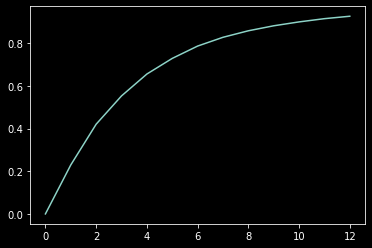

In [45]:
sns.lineplot(x=x,y=y)

In [42]:
len(dif[dif<1])

4060